
# Project: Investigate a Noshowappointment Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  The noshowappointment dataset is a collection of data about medical appointments in Brazil. Primarily, the data provides whether a patient showed up for the appointment or not.
The attributes of the data are highlighted below.A PatientID and the AppointmentID.
Age and sex of the patient.
Whether a patient has Hypertension, diabetes, or alcoholic.
Whether the patient has scholarship that covers health expenses, or has received sms for the appointment. 
The scheduled day and the appointment day.
No Show indicating whether the patient turn up or not.This is labelled as Yes or No.


### Question for Analysis
>  Among the following attributes, which is most predictive of whether a patient will attend the appointment.
1. Age
2. Gender
3. Sms notification
4. Scholarship

 

In [1]:
import pandas as pd
pd.options.display.max_rows = 120000
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Load data

path ='Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'
appointment_df= pd.read_csv(path)
appointment_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
appointment_df.shape

(110527, 14)

In [5]:
# check for null values in the data
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#appointment_df


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### Drop columns
PatientId, AppointmentID, ScheduledDay are both dropped. They are mere indentifiers without any significance to the analysis.

In [7]:
appointment_df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis = 1, inplace=True)


#### Rename columns
To maintain python naming convention. Typo in 'hipertension' corrected.

In [8]:
# Convert all columns to lowercases
appointment_df.rename(columns=lambda x: x.lower(), inplace=True)
appointment_df.columns

Index(['gender', 'appointmentday', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show'],
      dtype='object')

#### Further Renaming
The 'no_show' column renamed to 'showed_up' to avoid wrongly interpreting the data. The Yes/No values are swappped according to match the data.


In [9]:
appointment_df.rename(columns = {'appointmentday':'appointment_day',
                               'hipertension': 'hypertension', 'no-show': 'showed_up'}, inplace = True)
appointment_df.columns

Index(['gender', 'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'showed_up'],
      dtype='object')

In [10]:
# Get the indexes to swap: No ---> Yes
to_yes_indexes = appointment_df.index[appointment_df['showed_up'] == 'No'].tolist()
len(to_yes_indexes)

88208

In [11]:
# Get the indexes to swap: Yes ---> No
to_no_indexes = appointment_df.index[appointment_df['showed_up'] == 'Yes'].tolist()
len(to_no_indexes)

22319

In [12]:
# swap the values 
appointment_df.iloc[to_yes_indexes,[10]] = 'Yes'
appointment_df.iloc[to_no_indexes,[10]] = 'No'
appointment_df['showed_up'].value_counts()

Yes    88208
No     22319
Name: showed_up, dtype: int64

#### Convert appointment_day in string to datetime

In [13]:
# Examine the data type for appointment_day column
type(appointment_df['appointment_day'][0])

str

In [14]:
# Convert from string to datetime
appointment_df["appointment_day"] = appointment_df["appointment_day"].astype('datetime64[ns]')

In [15]:
type(appointment_df['appointment_day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
appointment_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [17]:
len(appointment_df['appointment_day'].unique())

27

In [18]:
appointment_df['showed_up'] = appointment_df['showed_up'].map({'Yes': 1, 'No': 0})

In [19]:
appointment_df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [20]:
# Get the min, 25%, 50%, 75%, max age values
appointment_df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [21]:
appointment_df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [22]:
# get the row with negative age
df_negative_age = appointment_df.query('age == -1')
df_negative_age

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
99832,F,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


In [23]:
# Drop row with the age of -1.
drop_index =  appointment_df.index[appointment_df['age'] < 0].tolist()
appointment_df.drop(drop_index, axis=0, inplace=True)


In [24]:
# Double check for non-positive numbers in the ages of the patients
appointment_df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

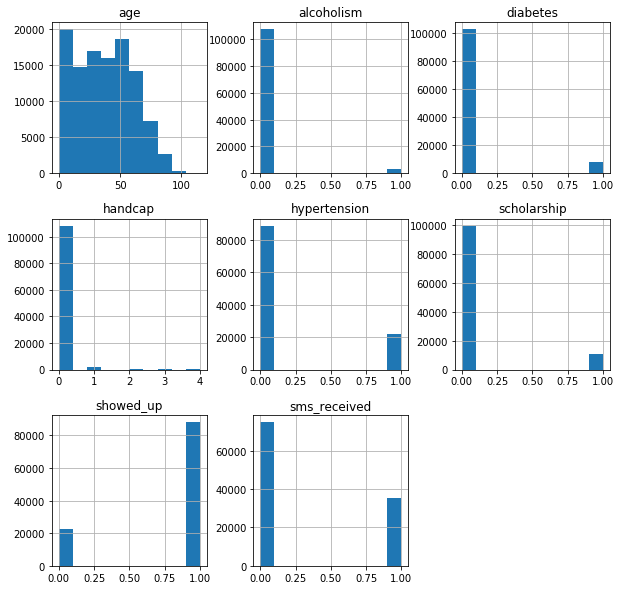

In [25]:
# Visualize the data descriptions
appointment_df.hist(figsize= (10,10));

### Observations from the Data
#### Age
Most of the patients were less than 50 years.

### Alcoholism
Only few were observed to have been alcoholics.

### Hypertension
Even though most of participants are not affected by hypertension, it is the ailment affected by most.
### Diabetes
Only a handful of participants are diabetic.

### Number that received sms message
Most participants do not receive any message notification for the appointment.

### Number that showed up
Most of the participants showed up for the appointment

In [26]:
appointment_df['handcap'].unique()

array([0, 1, 2, 3, 4])

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which of these attributes is most likely to determine whether a person will show up to the appointment?
1. Gender 
2. Age
3. Scholarship 
4. Whether sms was received or not


### Determining the age trends in those that showed up

In [27]:
# create a mask of to determine mean age of those that show up and those that do not
attended = appointment_df.showed_up == 1
not_attended = appointment_df.showed_up == 0


In [28]:
# compute mean age of those that showed_up
appointment_df.age[attended].mean()

37.790504154999034

In [29]:
# compute mean age of those that do not showed_up
appointment_df.age[not_attended].mean()

34.317666562121957

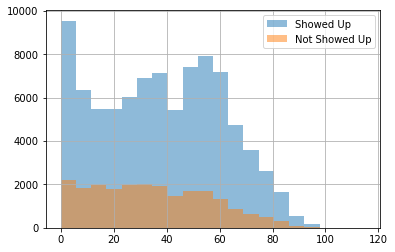

In [30]:
appointment_df.age[attended].hist(alpha=0.5, bins=20,label= 'Showed Up');
appointment_df.age[not_attended].hist(alpha=0.5, bins=20,label= 'Not Showed Up');
plt.legend();

### Observation
The statistical mean in ages of those that showed_up for the interview is slightly greater than those that did not attend.
Generally, the distribution for the two variables are quite similar.

#### Further Analysis into the age of patients 

In [31]:
appointment_df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [32]:
# group age into columns using the min, 25th, 50th, 75th percentiles and the max
bin_edges = [ 0, 19, 38, 56, 115]

# Labels for the age groups.
bin_names = ['teenagers', 'youths' ,'adults' , 'elderly' ] 

In [33]:
appointment_df['age_group'] = pd.cut(appointment_df['age'], bin_edges, labels=bin_names)

In [34]:
appointment_df['age_group'].value_counts()

youths       27334
adults       26912
teenagers    26872
elderly      25869
Name: age_group, dtype: int64

In [35]:
appointment_df.groupby(['age_group'])['showed_up'].mean()

age_group
teenagers    0.772923
youths       0.768054
adults       0.806852
elderly      0.843829
Name: showed_up, dtype: float64

In [36]:
# A method to draw create bar plot for mean and a selected feature/attribute
def show_mean_bar(feature, y_label):
    '''
    Takes a feature and the label for the y-axis as arguments.
    Shows the mean attendance of various unique values of an attribute.
    '''
    show_bar = appointment_df.groupby(feature)['showed_up'].mean().plot(kind='bar');
    show_bar.set_xlabel(y_label)
    show_bar.set_ylabel("Mean Attendance")
    show_bar.set_title("Showing mean of {}".format(y_label));
    
    

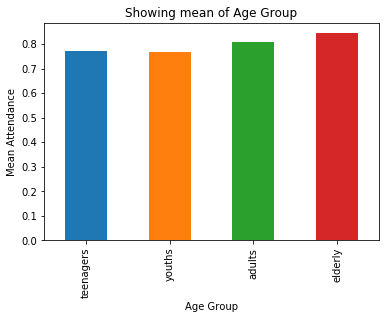

In [37]:
#Show the bar chart for the mean attendance of the various age groups
show_mean_bar('age_group', 'Age Group')

In [38]:
#appointment_df.groupby(['age_group'])['showed_up'].mean().plot(kind='bar');


### Observation
There is a positive correlation between age and the showe_up for the appointment. 

### Determinining how gender affected those that showed up

In [39]:
# View the count of males and females 
appointment_df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

There are more females than males in the data.

In [40]:
appointment_df.groupby(['gender']).showed_up.count()

gender
F    71839
M    38687
Name: showed_up, dtype: int64

In [41]:

appointment_df.groupby(['gender']).showed_up.value_counts()

gender  showed_up
F       1            57245
        0            14594
M       1            30962
        0             7725
Name: showed_up, dtype: int64

In [42]:
# Compute the mean of males and females that showed_up for the appointment
appointment_df.groupby(['gender']).showed_up.mean()

gender
F    0.796851
M    0.800321
Name: showed_up, dtype: float64

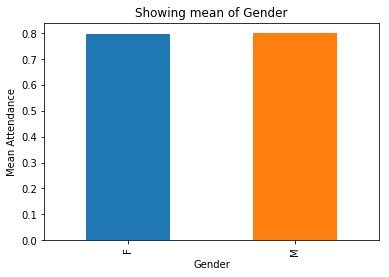

In [43]:

#Show the bar chart for the mean attendance of the male and females
show_mean_bar('gender', 'Gender')

### Observation
The mean of the number of males and females that showed up are almost the same with that of the males marginally higher.

### Determining how sms notifications influence the appointment

In [44]:
appointment_df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

Only about a third of the patients received sms notification for the appointment.

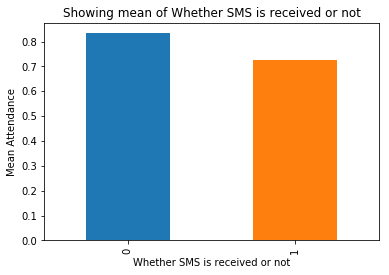

In [45]:
#Show the bar chart for the mean attendance of the various age groups
show_mean_bar('sms_received', 'Whether SMS is received or not')

### Observation
Those who did not receive sms notification have a higher mean attendance for the appointment than those who receive the sms notification.

### Determining how scholarship influence the appointment

In [46]:
appointment_df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

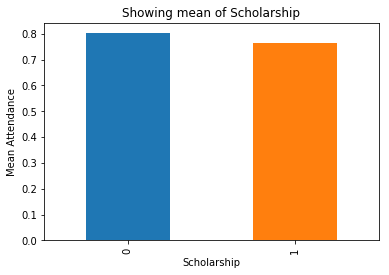

In [47]:
#Show the bar chart for the mean attendance those that received/do not received scholarship
show_mean_bar('scholarship', 'Scholarship')

### Observation
Those who did not have scholarship have a higher mean attendance for the appointment than those who receive the scholarship.

In [48]:
appointment_df.groupby(['hypertension']).showed_up.mean()

hypertension
0    0.790961
1    0.826980
Name: showed_up, dtype: float64

In [49]:
appointment_df.groupby(['diabetes']).showed_up.mean()

diabetes
0    0.796370
1    0.819967
Name: showed_up, dtype: float64

In [50]:
#appointment_df.groupby(['alcoholism', 'gender']).showed_up.mean().plot(kind='bar');

## Conclusions


> The analysis utilised statistical mean to determine the attribute that is most likely to predict whether a patient will show up for the appointment.
Among the attributes, both health coverage by scholarships and sms notifications do not make any impact on those that attended the appointment. The mean attendance compared to those that do not have scholarship nor received sms notifications is lower. 
Whether a patient is a male or female is less predictive with an approximate mean of **0.8** in both sexes.

> The most significant determinant in the analysis is the age of the patient. 
The mean of those that attended the appointment is approximated at 38 years much higher than those that do not attend, a mean of 34 years.
Further analysis show that the elderly, which fall in the fourth quartile obtained the highest mean of **0.84**, followed by adults **(0.81)**, youths and teenagers both with a mean of **0.77**.
The more the age the age of the patient, the more likely they will attend the appointment.

> **We conclude that among the attributes analysed, age is the most important in determining whether a patient have shown up to the appointment.**

> **Limitations**: The age distribution is skewed to the left. Most of patients are young and is more likely to affect the mean of those that showed up and those that do not. In future analysis, a fair representation of young people can be sampled to determine the mean attendance age.

### Progress After Submission

In [51]:
#https://github.com/MahmoudAdel-hub/Alx-project1/blob/Mahmoud/project%201.ipynb

In [52]:
appointment_df.head()

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up,age_group
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,elderly
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,adults
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,elderly
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,teenagers
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,adults


In [53]:
# get a mask of those that attended the appointment
show_appointment = appointment_df.showed_up == 1
show_appointment.count()

110526

In [54]:
no_show_appointment = appointment_df.showed_up == 0
no_show_appointment

In [63]:
appointment_df.age[no_show_appointment].mean()

34.317666562121957

In [64]:
appointment_df.age[show_appointment].mean()

37.790504154999034

In [72]:
appointment_df.sms_received[no_show_appointment].count()

22319

In [86]:
appointment_df.gender[no_show_appointment].value_counts()

F    14594
M     7725
Name: gender, dtype: int64

In [99]:
'''
value count those that received and those that do not received
a message but attended
'''
appointment_df.sms_received[show_appointment].value_counts()

0    62509
1    25698
Name: sms_received, dtype: int64

In [94]:
appointment_df.groupby(['gender']).showed_up.value_counts()

gender  showed_up
F       1            57245
        0            14594
M       1            30962
        0             7725
Name: showed_up, dtype: int64

In [92]:
'''
computes no of males that showed_up as against total males
and no of females that showed up as against total females
'''
appointment_df.groupby(['gender']).showed_up.mean()

gender
F    0.796851
M    0.800321
Name: showed_up, dtype: float64

In [89]:
appointment_df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

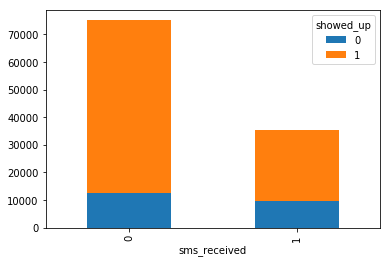

In [77]:
ax1 = appointment_df.groupby(['sms_received'])['showed_up'].value_counts().unstack().plot(kind='bar',stacked = True)

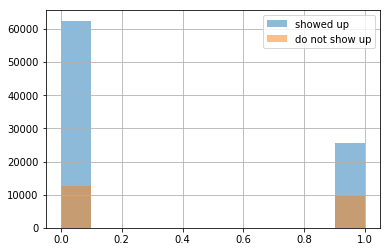

In [110]:
appointment_df.sms_received[show_appointment].hist(alpha=0.5, label='showed up')
appointment_df.sms_received[no_show_appointment].hist(alpha=0.5, label='do not show up')
plt.legend();

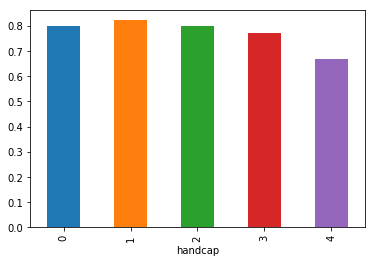

In [111]:
appointment_df.groupby('handcap').showed_up.mean().plot(kind='bar');

In [114]:
appointment_df.query('gender == "F"')['age'].median(), appointment_df.query('gender == "M"')['age'].median()

(39.0, 33.0)

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0